<a href="https://colab.research.google.com/github/iqrakhan310/CODSOFT-DS-PROJECTS-/blob/main/IRIS_CLASSIFICATION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**BASIC INFORMATION:**
The dataset contains 50 instances of 3 species comprises of different types of Iris flower.One class is linearly separable from other two while latter ones are not linearly separable from each other.

**-Features:**
1)Sepal length(cm)
2)Petal length(cm)
3)Sepal width(cm)
4)Petal width(cm)
5)Species:setosa,virginica and versicolor



IMPORTING ESSENTIAL LIBRARIES

In [2]:
#IMPORTING DATA VISUALIZATION & MANIPULATION LIBRARIES
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# to display plots and visualizations directly in the output cells
%matplotlib inline


IMPORTNING DATASET

In [3]:
#list
attributes=['sepal_lenght','sepal_width','petal_lenght','petal_width','species']
#loading dataset
data= pd.read_csv('iris.csv')
data.head()



,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
#display no of samples of each class
data['species'].value_counts()


setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

DATA VISUALIZATION

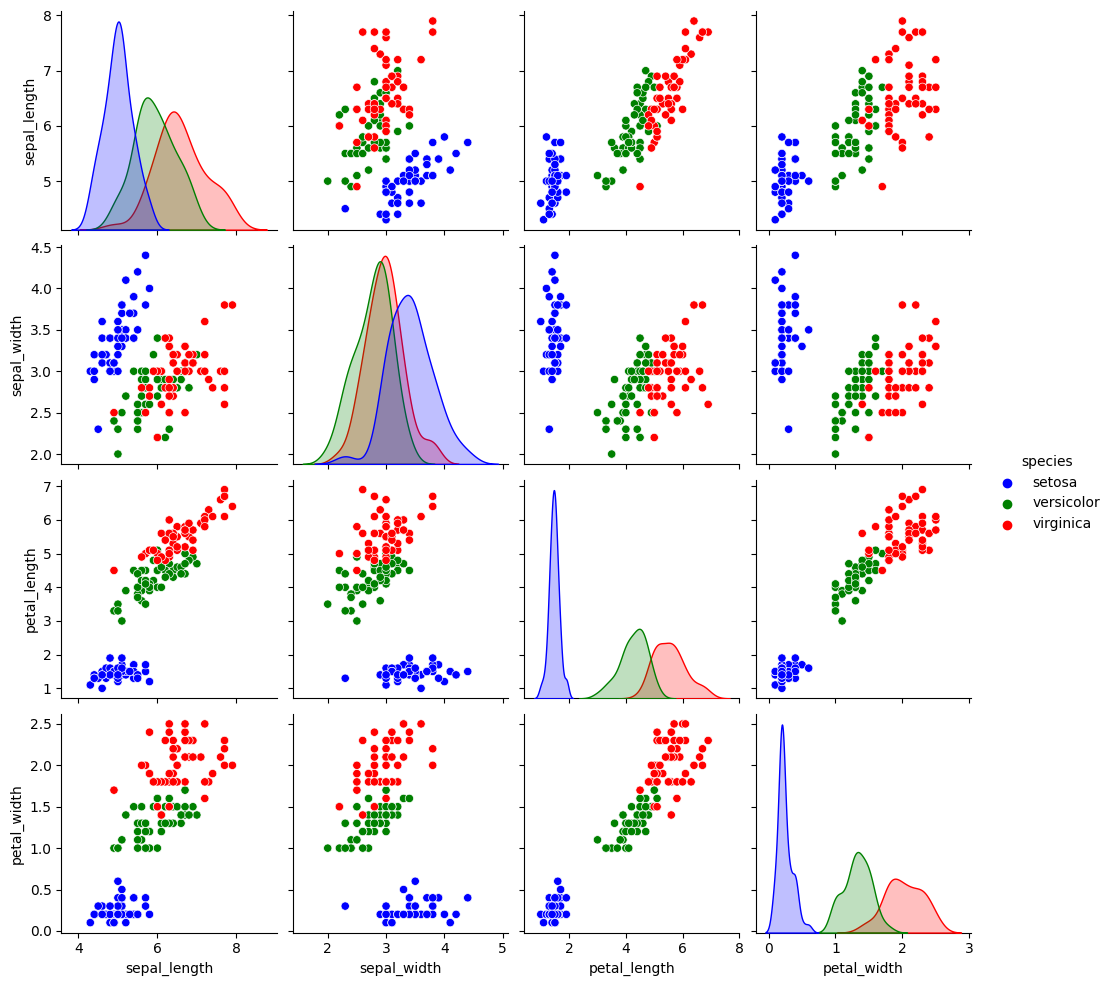

In [5]:
#display dataset statistics
data.describe()
#visualize data
custom_palette = {'setosa': 'blue', 'versicolor': 'green', 'virginica': 'red'}


sns.pairplot(data, hue='species', palette=custom_palette)


INPUT & OUTPUT FEATURES SEPARATION

In [ ]:
data_matrix=data.values
input=data_matrix[:,0:4]
output=data_matrix[:,4]
print(output)

TRAINING & TESTING DATASET


In [ ]:
#IMPORTING LIBRARY
from sklearn.model_selection import train_test_split
#spliting dataset
input_train,input_test,output_train,output_test= train_test_split(input,output,test_size=0.2)
print(output_train)

IMPLEMENTING ALGORITHMS
FIRST MODEL:SVM ALGORITHM

In [8]:
#SUPPORT VECTOR MACHINE ALGORITHM
from sklearn.svm import SVC
model_svc= SVC()
model_svc.fit(input_train, output_train)

SVC()

MODEL 1 PREDICTION & ACCURACY

In [ ]:
mod1_pred=model_svc.predict(input_test)
from sklearn.metrics import accuracy_score
print(accuracy_score(output_test,mod1_pred))
#for comparing testing data inputs & predictions
for x in range(len(mod1_pred)):
    print(output_test[x],mod1_pred[x])

MODEL 2 :LOGISTIC REGRESSION METHOD

In [ ]:
from sklearn.linear_model import LogisticRegression
model_LR= LogisticRegression()
model_LR.fit(input_train, output_train)

MODEL 2 PREDICTION & ACCURACY

In [11]:
mod2_pred=model_LR.predict(input_test)
from sklearn.metrics import accuracy_score
print(accuracy_score(output_test,mod2_pred))


0.9333333333333333


MODEL 3:DESICION TREE CLASSIFIER

In [12]:
from sklearn.tree import DecisionTreeClassifier
model_DCT= DecisionTreeClassifier()
model_DCT.fit(input_train, output_train)

DecisionTreeClassifier()

MODEL 3 PREDICTION & ACCURACY

In [13]:
mod3_pred=model_DCT.predict(input_test)
from sklearn.metrics import accuracy_score
print(accuracy_score(output_test,mod3_pred))

0.9333333333333333


CLASSIFICATION REPORT

In [14]:
from sklearn.metrics import classification_report
print(classification_report(output_test,mod1_pred))


              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00         9
  versicolor       0.92      0.92      0.92        13
   virginica       0.88      0.88      0.88         8

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30



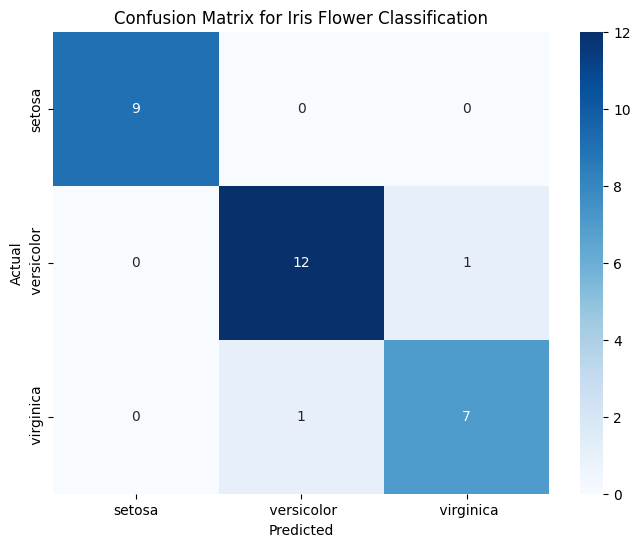

In [15]:
from sklearn.metrics import confusion_matrix

# Create a confusion matrix
cm = confusion_matrix(output_test, mod3_pred)
target_names=['setosa',' versicolor',  ' virginica' ]
# Plot the confusion matrix using Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=target_names, yticklabels=target_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Iris Flower Classification')
plt.show()

NEW INPUTS TO MODEL

In [16]:
input_x=np.array([[4,2.3,5.4,1.2],[3,2,1,0.2],[5.3,2,5.2,1.4],[6,3,3.2,0.3],[1.5,4.5,6.4,0.6]])
prediction=model_svc.predict(input_x)
print("species prediction:{}".format(prediction))

species prediction:['virginica' 'setosa' 'virginica' 'versicolor' 'virginica']
